In [45]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import re
import csv
from textblob import TextBlob
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
#import plotly.offline as py
#py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

df = pd.read_csv('tweets.csv',encoding= "ISO-8859–1")
df

,tweet_id,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703061e+17,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,5.703011e+17,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,5.703011e+17,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,5.703010e+17,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,5.703008e+17,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...
14635,5.695877e+17,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,5.695874e+17,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,5.695872e+17,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,5.695872e+17,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [46]:
df.columns

Index(['tweet_id', 'airline', 'name', 'retweet_count', 'text', 'tweet_coord',
       'tweet_created', 'tweet_location', 'user_timezone'],
      dtype='object')

In [47]:
df.isnull().sum()

tweet_id              0
airline               0
name                  0
retweet_count         0
text                  0
tweet_coord       13621
tweet_created         0
tweet_location     4733
user_timezone      4820
dtype: int64

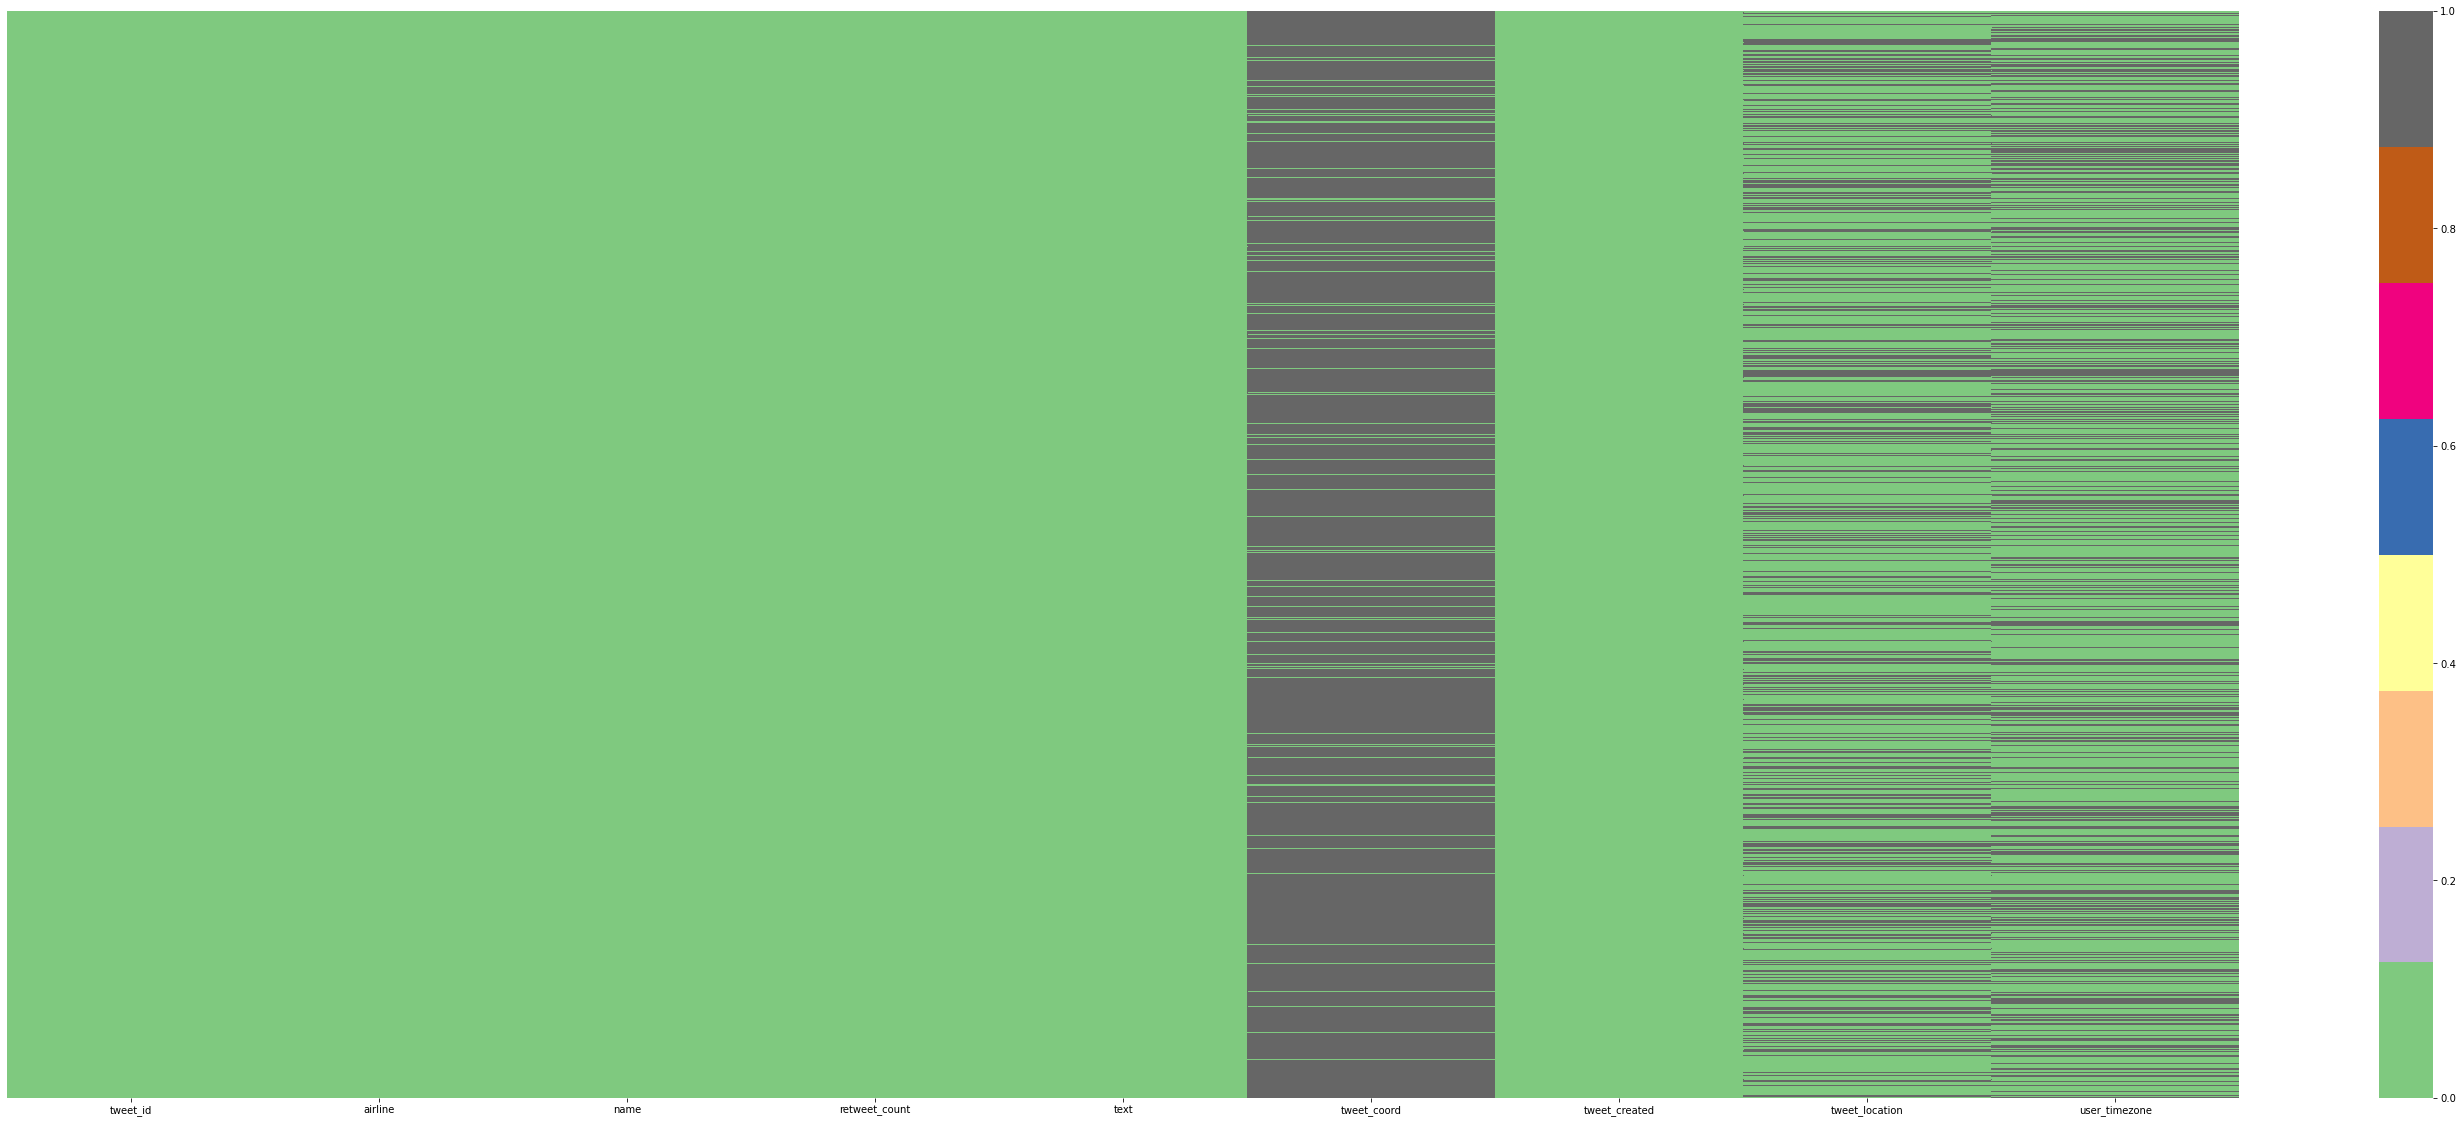

In [48]:
plt.figure(figsize=(50,20))
sns.heatmap(df.isnull(), yticklabels=False, cmap= 'Accent')
plt.show()


In [49]:
df.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

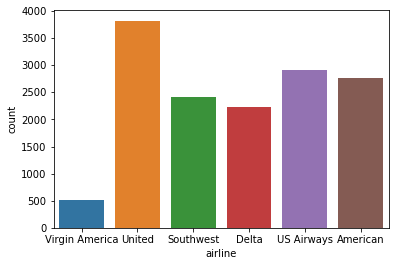

In [50]:
sns.countplot(df.airline)

## Sentiment Analysis

In [51]:
df.text[279]
from bs4 import BeautifulSoup
example1 = BeautifulSoup(df.text[279], 'lxml')
print(example1.get_text())

@VirginAmerica what is your policy on flying after surgery?  I am still waiting for answer so I can tell me doctor.


In [52]:
re.sub(r'@[A-Za-z0-9]+','',df.text[279])

' what is your policy on flying after surgery?  I am still waiting for answer so I can tell me doctor.'

In [53]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = df.text[:100]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result

nums = [0,14640]
print ("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(nums[0],nums[1]):
    print ("Tweets %d of %d has been processed" % ( i+1, nums[1] ) )  
   
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))
    

#For the rest, you get the idea, I divided the whole dataset into four batches.Saving cleaned data as csv
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['airline'] = df.airline
clean_df.head()

clean_df.to_csv('clean_tweet.csv',encoding='utf-8')
csv = 'clean_tweet.csv'
new_df = pd.read_csv(csv,index_col=0)
new_df.to_csv('Final.csv', mode='w', index=False, encoding="utf-8")
final_df = pd.read_csv('Final.csv')
print('The Parsing is complete')

Cleaning and parsing the tweets...

Tweets 1 of 14640 has been processed
Tweets 2 of 14640 has been processed
Tweets 3 of 14640 has been processed
Tweets 4 of 14640 has been processed
Tweets 5 of 14640 has been processed
Tweets 6 of 14640 has been processed
Tweets 7 of 14640 has been processed
Tweets 8 of 14640 has been processed
Tweets 9 of 14640 has been processed
Tweets 10 of 14640 has been processed
Tweets 11 of 14640 has been processed
Tweets 12 of 14640 has been processed
Tweets 13 of 14640 has been processed
Tweets 14 of 14640 has been processed
Tweets 15 of 14640 has been processed
Tweets 16 of 14640 has been processed
Tweets 17 of 14640 has been processed
Tweets 18 of 14640 has been processed
Tweets 19 of 14640 has been processed
Tweets 20 of 14640 has been processed
Tweets 21 of 14640 has been processed
Tweets 22 of 14640 has been processed
Tweets 23 of 14640 has been processed
Tweets 24 of 14640 has been processed
Tweets 25 of 14640 has been processed
Tweets 26 of 14640 has 

Tweets 332 of 14640 has been processed
Tweets 333 of 14640 has been processed
Tweets 334 of 14640 has been processed
Tweets 335 of 14640 has been processed
Tweets 336 of 14640 has been processed
Tweets 337 of 14640 has been processed
Tweets 338 of 14640 has been processed
Tweets 339 of 14640 has been processed
Tweets 340 of 14640 has been processed
Tweets 341 of 14640 has been processed
Tweets 342 of 14640 has been processed
Tweets 343 of 14640 has been processed
Tweets 344 of 14640 has been processed
Tweets 345 of 14640 has been processed
Tweets 346 of 14640 has been processed
Tweets 347 of 14640 has been processed
Tweets 348 of 14640 has been processed
Tweets 349 of 14640 has been processed
Tweets 350 of 14640 has been processed
Tweets 351 of 14640 has been processed
Tweets 352 of 14640 has been processed
Tweets 353 of 14640 has been processed
Tweets 354 of 14640 has been processed
Tweets 355 of 14640 has been processed
Tweets 356 of 14640 has been processed
Tweets 357 of 14640 has b

Tweets 680 of 14640 has been processed
Tweets 681 of 14640 has been processed
Tweets 682 of 14640 has been processed
Tweets 683 of 14640 has been processed
Tweets 684 of 14640 has been processed
Tweets 685 of 14640 has been processed
Tweets 686 of 14640 has been processed
Tweets 687 of 14640 has been processed
Tweets 688 of 14640 has been processed
Tweets 689 of 14640 has been processed
Tweets 690 of 14640 has been processed
Tweets 691 of 14640 has been processed
Tweets 692 of 14640 has been processed
Tweets 693 of 14640 has been processed
Tweets 694 of 14640 has been processed
Tweets 695 of 14640 has been processed
Tweets 696 of 14640 has been processed
Tweets 697 of 14640 has been processed
Tweets 698 of 14640 has been processed
Tweets 699 of 14640 has been processed
Tweets 700 of 14640 has been processed
Tweets 701 of 14640 has been processed
Tweets 702 of 14640 has been processed
Tweets 703 of 14640 has been processed
Tweets 704 of 14640 has been processed
Tweets 705 of 14640 has b

Tweets 1013 of 14640 has been processed
Tweets 1014 of 14640 has been processed
Tweets 1015 of 14640 has been processed
Tweets 1016 of 14640 has been processed
Tweets 1017 of 14640 has been processed
Tweets 1018 of 14640 has been processed
Tweets 1019 of 14640 has been processed
Tweets 1020 of 14640 has been processed
Tweets 1021 of 14640 has been processed
Tweets 1022 of 14640 has been processed
Tweets 1023 of 14640 has been processed
Tweets 1024 of 14640 has been processed
Tweets 1025 of 14640 has been processed
Tweets 1026 of 14640 has been processed
Tweets 1027 of 14640 has been processed
Tweets 1028 of 14640 has been processed
Tweets 1029 of 14640 has been processed
Tweets 1030 of 14640 has been processed
Tweets 1031 of 14640 has been processed
Tweets 1032 of 14640 has been processed
Tweets 1033 of 14640 has been processed
Tweets 1034 of 14640 has been processed
Tweets 1035 of 14640 has been processed
Tweets 1036 of 14640 has been processed
Tweets 1037 of 14640 has been processed


Tweets 1365 of 14640 has been processed
Tweets 1366 of 14640 has been processed
Tweets 1367 of 14640 has been processed
Tweets 1368 of 14640 has been processed
Tweets 1369 of 14640 has been processed
Tweets 1370 of 14640 has been processed
Tweets 1371 of 14640 has been processed
Tweets 1372 of 14640 has been processed
Tweets 1373 of 14640 has been processed
Tweets 1374 of 14640 has been processed
Tweets 1375 of 14640 has been processed
Tweets 1376 of 14640 has been processed
Tweets 1377 of 14640 has been processed
Tweets 1378 of 14640 has been processed
Tweets 1379 of 14640 has been processed
Tweets 1380 of 14640 has been processed
Tweets 1381 of 14640 has been processed
Tweets 1382 of 14640 has been processed
Tweets 1383 of 14640 has been processed
Tweets 1384 of 14640 has been processed
Tweets 1385 of 14640 has been processed
Tweets 1386 of 14640 has been processed
Tweets 1387 of 14640 has been processed
Tweets 1388 of 14640 has been processed
Tweets 1389 of 14640 has been processed


Tweets 1694 of 14640 has been processed
Tweets 1695 of 14640 has been processed
Tweets 1696 of 14640 has been processed
Tweets 1697 of 14640 has been processed
Tweets 1698 of 14640 has been processed
Tweets 1699 of 14640 has been processed
Tweets 1700 of 14640 has been processed
Tweets 1701 of 14640 has been processed
Tweets 1702 of 14640 has been processed
Tweets 1703 of 14640 has been processed
Tweets 1704 of 14640 has been processed
Tweets 1705 of 14640 has been processed
Tweets 1706 of 14640 has been processed
Tweets 1707 of 14640 has been processed
Tweets 1708 of 14640 has been processed
Tweets 1709 of 14640 has been processed
Tweets 1710 of 14640 has been processed
Tweets 1711 of 14640 has been processed
Tweets 1712 of 14640 has been processed
Tweets 1713 of 14640 has been processed
Tweets 1714 of 14640 has been processed
Tweets 1715 of 14640 has been processed
Tweets 1716 of 14640 has been processed
Tweets 1717 of 14640 has been processed
Tweets 1718 of 14640 has been processed


Tweets 2033 of 14640 has been processed
Tweets 2034 of 14640 has been processed
Tweets 2035 of 14640 has been processed
Tweets 2036 of 14640 has been processed
Tweets 2037 of 14640 has been processed
Tweets 2038 of 14640 has been processed
Tweets 2039 of 14640 has been processed
Tweets 2040 of 14640 has been processed
Tweets 2041 of 14640 has been processed
Tweets 2042 of 14640 has been processed
Tweets 2043 of 14640 has been processed
Tweets 2044 of 14640 has been processed
Tweets 2045 of 14640 has been processed
Tweets 2046 of 14640 has been processed
Tweets 2047 of 14640 has been processed
Tweets 2048 of 14640 has been processed
Tweets 2049 of 14640 has been processed
Tweets 2050 of 14640 has been processed
Tweets 2051 of 14640 has been processed
Tweets 2052 of 14640 has been processed
Tweets 2053 of 14640 has been processed
Tweets 2054 of 14640 has been processed
Tweets 2055 of 14640 has been processed
Tweets 2056 of 14640 has been processed
Tweets 2057 of 14640 has been processed


Tweets 2381 of 14640 has been processed
Tweets 2382 of 14640 has been processed
Tweets 2383 of 14640 has been processed
Tweets 2384 of 14640 has been processed
Tweets 2385 of 14640 has been processed
Tweets 2386 of 14640 has been processed
Tweets 2387 of 14640 has been processed
Tweets 2388 of 14640 has been processed
Tweets 2389 of 14640 has been processed
Tweets 2390 of 14640 has been processed
Tweets 2391 of 14640 has been processed
Tweets 2392 of 14640 has been processed
Tweets 2393 of 14640 has been processed
Tweets 2394 of 14640 has been processed
Tweets 2395 of 14640 has been processed
Tweets 2396 of 14640 has been processed
Tweets 2397 of 14640 has been processed
Tweets 2398 of 14640 has been processed
Tweets 2399 of 14640 has been processed
Tweets 2400 of 14640 has been processed
Tweets 2401 of 14640 has been processed
Tweets 2402 of 14640 has been processed
Tweets 2403 of 14640 has been processed
Tweets 2404 of 14640 has been processed
Tweets 2405 of 14640 has been processed


Tweets 2639 of 14640 has been processed
Tweets 2640 of 14640 has been processed
Tweets 2641 of 14640 has been processed
Tweets 2642 of 14640 has been processed
Tweets 2643 of 14640 has been processed
Tweets 2644 of 14640 has been processed
Tweets 2645 of 14640 has been processed
Tweets 2646 of 14640 has been processed
Tweets 2647 of 14640 has been processed
Tweets 2648 of 14640 has been processed
Tweets 2649 of 14640 has been processed
Tweets 2650 of 14640 has been processed
Tweets 2651 of 14640 has been processed
Tweets 2652 of 14640 has been processed
Tweets 2653 of 14640 has been processed
Tweets 2654 of 14640 has been processed
Tweets 2655 of 14640 has been processed
Tweets 2656 of 14640 has been processed
Tweets 2657 of 14640 has been processed
Tweets 2658 of 14640 has been processed
Tweets 2659 of 14640 has been processed
Tweets 2660 of 14640 has been processed
Tweets 2661 of 14640 has been processed
Tweets 2662 of 14640 has been processed
Tweets 2663 of 14640 has been processed


Tweets 2990 of 14640 has been processed
Tweets 2991 of 14640 has been processed
Tweets 2992 of 14640 has been processed
Tweets 2993 of 14640 has been processed
Tweets 2994 of 14640 has been processed
Tweets 2995 of 14640 has been processed
Tweets 2996 of 14640 has been processed
Tweets 2997 of 14640 has been processed
Tweets 2998 of 14640 has been processed
Tweets 2999 of 14640 has been processed
Tweets 3000 of 14640 has been processed
Tweets 3001 of 14640 has been processed
Tweets 3002 of 14640 has been processed
Tweets 3003 of 14640 has been processed
Tweets 3004 of 14640 has been processed
Tweets 3005 of 14640 has been processed
Tweets 3006 of 14640 has been processed
Tweets 3007 of 14640 has been processed
Tweets 3008 of 14640 has been processed
Tweets 3009 of 14640 has been processed
Tweets 3010 of 14640 has been processed
Tweets 3011 of 14640 has been processed
Tweets 3012 of 14640 has been processed
Tweets 3013 of 14640 has been processed
Tweets 3014 of 14640 has been processed


Tweets 3341 of 14640 has been processed
Tweets 3342 of 14640 has been processed
Tweets 3343 of 14640 has been processed
Tweets 3344 of 14640 has been processed
Tweets 3345 of 14640 has been processed
Tweets 3346 of 14640 has been processed
Tweets 3347 of 14640 has been processed
Tweets 3348 of 14640 has been processed
Tweets 3349 of 14640 has been processed
Tweets 3350 of 14640 has been processed
Tweets 3351 of 14640 has been processed
Tweets 3352 of 14640 has been processed
Tweets 3353 of 14640 has been processed
Tweets 3354 of 14640 has been processed
Tweets 3355 of 14640 has been processed
Tweets 3356 of 14640 has been processed
Tweets 3357 of 14640 has been processed
Tweets 3358 of 14640 has been processed
Tweets 3359 of 14640 has been processed
Tweets 3360 of 14640 has been processed
Tweets 3361 of 14640 has been processed
Tweets 3362 of 14640 has been processed
Tweets 3363 of 14640 has been processed
Tweets 3364 of 14640 has been processed
Tweets 3365 of 14640 has been processed


Tweets 3717 of 14640 has been processed
Tweets 3718 of 14640 has been processed
Tweets 3719 of 14640 has been processed
Tweets 3720 of 14640 has been processed
Tweets 3721 of 14640 has been processed
Tweets 3722 of 14640 has been processed
Tweets 3723 of 14640 has been processed
Tweets 3724 of 14640 has been processed
Tweets 3725 of 14640 has been processed
Tweets 3726 of 14640 has been processed
Tweets 3727 of 14640 has been processed
Tweets 3728 of 14640 has been processed
Tweets 3729 of 14640 has been processed
Tweets 3730 of 14640 has been processed
Tweets 3731 of 14640 has been processed
Tweets 3732 of 14640 has been processed
Tweets 3733 of 14640 has been processed
Tweets 3734 of 14640 has been processed
Tweets 3735 of 14640 has been processed
Tweets 3736 of 14640 has been processed
Tweets 3737 of 14640 has been processed
Tweets 3738 of 14640 has been processed
Tweets 3739 of 14640 has been processed
Tweets 3740 of 14640 has been processed
Tweets 3741 of 14640 has been processed


Tweets 4071 of 14640 has been processed
Tweets 4072 of 14640 has been processed
Tweets 4073 of 14640 has been processed
Tweets 4074 of 14640 has been processed
Tweets 4075 of 14640 has been processed
Tweets 4076 of 14640 has been processed
Tweets 4077 of 14640 has been processed
Tweets 4078 of 14640 has been processed
Tweets 4079 of 14640 has been processed
Tweets 4080 of 14640 has been processed
Tweets 4081 of 14640 has been processed
Tweets 4082 of 14640 has been processed
Tweets 4083 of 14640 has been processed
Tweets 4084 of 14640 has been processed
Tweets 4085 of 14640 has been processed
Tweets 4086 of 14640 has been processed
Tweets 4087 of 14640 has been processed
Tweets 4088 of 14640 has been processed
Tweets 4089 of 14640 has been processed
Tweets 4090 of 14640 has been processed
Tweets 4091 of 14640 has been processed
Tweets 4092 of 14640 has been processed
Tweets 4093 of 14640 has been processed
Tweets 4094 of 14640 has been processed
Tweets 4095 of 14640 has been processed


Tweets 4429 of 14640 has been processed
Tweets 4430 of 14640 has been processed
Tweets 4431 of 14640 has been processed
Tweets 4432 of 14640 has been processed
Tweets 4433 of 14640 has been processed
Tweets 4434 of 14640 has been processed
Tweets 4435 of 14640 has been processed
Tweets 4436 of 14640 has been processed
Tweets 4437 of 14640 has been processed
Tweets 4438 of 14640 has been processed
Tweets 4439 of 14640 has been processed
Tweets 4440 of 14640 has been processed
Tweets 4441 of 14640 has been processed
Tweets 4442 of 14640 has been processed
Tweets 4443 of 14640 has been processed
Tweets 4444 of 14640 has been processed
Tweets 4445 of 14640 has been processed
Tweets 4446 of 14640 has been processed
Tweets 4447 of 14640 has been processed
Tweets 4448 of 14640 has been processed
Tweets 4449 of 14640 has been processed
Tweets 4450 of 14640 has been processed
Tweets 4451 of 14640 has been processed
Tweets 4452 of 14640 has been processed
Tweets 4453 of 14640 has been processed


Tweets 4793 of 14640 has been processed
Tweets 4794 of 14640 has been processed
Tweets 4795 of 14640 has been processed
Tweets 4796 of 14640 has been processed
Tweets 4797 of 14640 has been processed
Tweets 4798 of 14640 has been processed
Tweets 4799 of 14640 has been processed
Tweets 4800 of 14640 has been processed
Tweets 4801 of 14640 has been processed
Tweets 4802 of 14640 has been processed
Tweets 4803 of 14640 has been processed
Tweets 4804 of 14640 has been processed
Tweets 4805 of 14640 has been processed
Tweets 4806 of 14640 has been processed
Tweets 4807 of 14640 has been processed
Tweets 4808 of 14640 has been processed
Tweets 4809 of 14640 has been processed
Tweets 4810 of 14640 has been processed
Tweets 4811 of 14640 has been processed
Tweets 4812 of 14640 has been processed
Tweets 4813 of 14640 has been processed
Tweets 4814 of 14640 has been processed
Tweets 4815 of 14640 has been processed
Tweets 4816 of 14640 has been processed
Tweets 4817 of 14640 has been processed


Tweets 5159 of 14640 has been processed
Tweets 5160 of 14640 has been processed
Tweets 5161 of 14640 has been processed
Tweets 5162 of 14640 has been processed
Tweets 5163 of 14640 has been processed
Tweets 5164 of 14640 has been processed
Tweets 5165 of 14640 has been processed
Tweets 5166 of 14640 has been processed
Tweets 5167 of 14640 has been processed
Tweets 5168 of 14640 has been processed
Tweets 5169 of 14640 has been processed
Tweets 5170 of 14640 has been processed
Tweets 5171 of 14640 has been processed
Tweets 5172 of 14640 has been processed
Tweets 5173 of 14640 has been processed
Tweets 5174 of 14640 has been processed
Tweets 5175 of 14640 has been processed
Tweets 5176 of 14640 has been processed
Tweets 5177 of 14640 has been processed
Tweets 5178 of 14640 has been processed
Tweets 5179 of 14640 has been processed
Tweets 5180 of 14640 has been processed
Tweets 5181 of 14640 has been processed
Tweets 5182 of 14640 has been processed
Tweets 5183 of 14640 has been processed


Tweets 5507 of 14640 has been processed
Tweets 5508 of 14640 has been processed
Tweets 5509 of 14640 has been processed
Tweets 5510 of 14640 has been processed
Tweets 5511 of 14640 has been processed
Tweets 5512 of 14640 has been processed
Tweets 5513 of 14640 has been processed
Tweets 5514 of 14640 has been processed
Tweets 5515 of 14640 has been processed
Tweets 5516 of 14640 has been processed
Tweets 5517 of 14640 has been processed
Tweets 5518 of 14640 has been processed
Tweets 5519 of 14640 has been processed
Tweets 5520 of 14640 has been processed
Tweets 5521 of 14640 has been processed
Tweets 5522 of 14640 has been processed
Tweets 5523 of 14640 has been processed
Tweets 5524 of 14640 has been processed
Tweets 5525 of 14640 has been processed
Tweets 5526 of 14640 has been processed
Tweets 5527 of 14640 has been processed
Tweets 5528 of 14640 has been processed
Tweets 5529 of 14640 has been processed
Tweets 5530 of 14640 has been processed
Tweets 5531 of 14640 has been processed


Tweets 5867 of 14640 has been processed
Tweets 5868 of 14640 has been processed
Tweets 5869 of 14640 has been processed
Tweets 5870 of 14640 has been processed
Tweets 5871 of 14640 has been processed
Tweets 5872 of 14640 has been processed
Tweets 5873 of 14640 has been processed
Tweets 5874 of 14640 has been processed
Tweets 5875 of 14640 has been processed
Tweets 5876 of 14640 has been processed
Tweets 5877 of 14640 has been processed
Tweets 5878 of 14640 has been processed
Tweets 5879 of 14640 has been processed
Tweets 5880 of 14640 has been processed
Tweets 5881 of 14640 has been processed
Tweets 5882 of 14640 has been processed
Tweets 5883 of 14640 has been processed
Tweets 5884 of 14640 has been processed
Tweets 5885 of 14640 has been processed
Tweets 5886 of 14640 has been processed
Tweets 5887 of 14640 has been processed
Tweets 5888 of 14640 has been processed
Tweets 5889 of 14640 has been processed
Tweets 5890 of 14640 has been processed
Tweets 5891 of 14640 has been processed


Tweets 6218 of 14640 has been processed
Tweets 6219 of 14640 has been processed
Tweets 6220 of 14640 has been processed
Tweets 6221 of 14640 has been processed
Tweets 6222 of 14640 has been processed
Tweets 6223 of 14640 has been processed
Tweets 6224 of 14640 has been processed
Tweets 6225 of 14640 has been processed
Tweets 6226 of 14640 has been processed
Tweets 6227 of 14640 has been processed
Tweets 6228 of 14640 has been processed
Tweets 6229 of 14640 has been processed
Tweets 6230 of 14640 has been processed
Tweets 6231 of 14640 has been processed
Tweets 6232 of 14640 has been processed
Tweets 6233 of 14640 has been processed
Tweets 6234 of 14640 has been processed
Tweets 6235 of 14640 has been processed
Tweets 6236 of 14640 has been processed
Tweets 6237 of 14640 has been processed
Tweets 6238 of 14640 has been processed
Tweets 6239 of 14640 has been processed
Tweets 6240 of 14640 has been processed
Tweets 6241 of 14640 has been processed
Tweets 6242 of 14640 has been processed


Tweets 6573 of 14640 has been processed
Tweets 6574 of 14640 has been processed
Tweets 6575 of 14640 has been processed
Tweets 6576 of 14640 has been processed
Tweets 6577 of 14640 has been processed
Tweets 6578 of 14640 has been processed
Tweets 6579 of 14640 has been processed
Tweets 6580 of 14640 has been processed
Tweets 6581 of 14640 has been processed
Tweets 6582 of 14640 has been processed
Tweets 6583 of 14640 has been processed
Tweets 6584 of 14640 has been processed
Tweets 6585 of 14640 has been processed
Tweets 6586 of 14640 has been processed
Tweets 6587 of 14640 has been processed
Tweets 6588 of 14640 has been processed
Tweets 6589 of 14640 has been processed
Tweets 6590 of 14640 has been processed
Tweets 6591 of 14640 has been processed
Tweets 6592 of 14640 has been processed
Tweets 6593 of 14640 has been processed
Tweets 6594 of 14640 has been processed
Tweets 6595 of 14640 has been processed
Tweets 6596 of 14640 has been processed
Tweets 6597 of 14640 has been processed


Tweets 6933 of 14640 has been processed
Tweets 6934 of 14640 has been processed
Tweets 6935 of 14640 has been processed
Tweets 6936 of 14640 has been processed
Tweets 6937 of 14640 has been processed
Tweets 6938 of 14640 has been processed
Tweets 6939 of 14640 has been processed
Tweets 6940 of 14640 has been processed
Tweets 6941 of 14640 has been processed
Tweets 6942 of 14640 has been processed
Tweets 6943 of 14640 has been processed
Tweets 6944 of 14640 has been processed
Tweets 6945 of 14640 has been processed
Tweets 6946 of 14640 has been processed
Tweets 6947 of 14640 has been processed
Tweets 6948 of 14640 has been processed
Tweets 6949 of 14640 has been processed
Tweets 6950 of 14640 has been processed
Tweets 6951 of 14640 has been processed
Tweets 6952 of 14640 has been processed
Tweets 6953 of 14640 has been processed
Tweets 6954 of 14640 has been processed
Tweets 6955 of 14640 has been processed
Tweets 6956 of 14640 has been processed
Tweets 6957 of 14640 has been processed


Tweets 7284 of 14640 has been processed
Tweets 7285 of 14640 has been processed
Tweets 7286 of 14640 has been processed
Tweets 7287 of 14640 has been processed
Tweets 7288 of 14640 has been processed
Tweets 7289 of 14640 has been processed
Tweets 7290 of 14640 has been processed
Tweets 7291 of 14640 has been processed
Tweets 7292 of 14640 has been processed
Tweets 7293 of 14640 has been processed
Tweets 7294 of 14640 has been processed
Tweets 7295 of 14640 has been processed
Tweets 7296 of 14640 has been processed
Tweets 7297 of 14640 has been processed
Tweets 7298 of 14640 has been processed
Tweets 7299 of 14640 has been processed
Tweets 7300 of 14640 has been processed
Tweets 7301 of 14640 has been processed
Tweets 7302 of 14640 has been processed
Tweets 7303 of 14640 has been processed
Tweets 7304 of 14640 has been processed
Tweets 7305 of 14640 has been processed
Tweets 7306 of 14640 has been processed
Tweets 7307 of 14640 has been processed
Tweets 7308 of 14640 has been processed


Tweets 7639 of 14640 has been processed
Tweets 7640 of 14640 has been processed
Tweets 7641 of 14640 has been processed
Tweets 7642 of 14640 has been processed
Tweets 7643 of 14640 has been processed
Tweets 7644 of 14640 has been processed
Tweets 7645 of 14640 has been processed
Tweets 7646 of 14640 has been processed
Tweets 7647 of 14640 has been processed
Tweets 7648 of 14640 has been processed
Tweets 7649 of 14640 has been processed
Tweets 7650 of 14640 has been processed
Tweets 7651 of 14640 has been processed
Tweets 7652 of 14640 has been processed
Tweets 7653 of 14640 has been processed
Tweets 7654 of 14640 has been processed
Tweets 7655 of 14640 has been processed
Tweets 7656 of 14640 has been processed
Tweets 7657 of 14640 has been processed
Tweets 7658 of 14640 has been processed
Tweets 7659 of 14640 has been processed
Tweets 7660 of 14640 has been processed
Tweets 7661 of 14640 has been processed
Tweets 7662 of 14640 has been processed
Tweets 7663 of 14640 has been processed


Tweets 7997 of 14640 has been processed
Tweets 7998 of 14640 has been processed
Tweets 7999 of 14640 has been processed
Tweets 8000 of 14640 has been processed
Tweets 8001 of 14640 has been processed
Tweets 8002 of 14640 has been processed
Tweets 8003 of 14640 has been processed
Tweets 8004 of 14640 has been processed
Tweets 8005 of 14640 has been processed
Tweets 8006 of 14640 has been processed
Tweets 8007 of 14640 has been processed
Tweets 8008 of 14640 has been processed
Tweets 8009 of 14640 has been processed
Tweets 8010 of 14640 has been processed
Tweets 8011 of 14640 has been processed
Tweets 8012 of 14640 has been processed
Tweets 8013 of 14640 has been processed
Tweets 8014 of 14640 has been processed
Tweets 8015 of 14640 has been processed
Tweets 8016 of 14640 has been processed
Tweets 8017 of 14640 has been processed
Tweets 8018 of 14640 has been processed
Tweets 8019 of 14640 has been processed
Tweets 8020 of 14640 has been processed
Tweets 8021 of 14640 has been processed


Tweets 8366 of 14640 has been processed
Tweets 8367 of 14640 has been processed
Tweets 8368 of 14640 has been processed
Tweets 8369 of 14640 has been processed
Tweets 8370 of 14640 has been processed
Tweets 8371 of 14640 has been processed
Tweets 8372 of 14640 has been processed
Tweets 8373 of 14640 has been processed
Tweets 8374 of 14640 has been processed
Tweets 8375 of 14640 has been processed
Tweets 8376 of 14640 has been processed
Tweets 8377 of 14640 has been processed
Tweets 8378 of 14640 has been processed
Tweets 8379 of 14640 has been processed
Tweets 8380 of 14640 has been processed
Tweets 8381 of 14640 has been processed
Tweets 8382 of 14640 has been processed
Tweets 8383 of 14640 has been processed
Tweets 8384 of 14640 has been processed
Tweets 8385 of 14640 has been processed
Tweets 8386 of 14640 has been processed
Tweets 8387 of 14640 has been processed
Tweets 8388 of 14640 has been processed
Tweets 8389 of 14640 has been processed
Tweets 8390 of 14640 has been processed


Tweets 8688 of 14640 has been processed
Tweets 8689 of 14640 has been processed
Tweets 8690 of 14640 has been processed
Tweets 8691 of 14640 has been processed
Tweets 8692 of 14640 has been processed
Tweets 8693 of 14640 has been processed
Tweets 8694 of 14640 has been processed
Tweets 8695 of 14640 has been processed
Tweets 8696 of 14640 has been processed
Tweets 8697 of 14640 has been processed
Tweets 8698 of 14640 has been processed
Tweets 8699 of 14640 has been processed
Tweets 8700 of 14640 has been processed
Tweets 8701 of 14640 has been processed
Tweets 8702 of 14640 has been processed
Tweets 8703 of 14640 has been processed
Tweets 8704 of 14640 has been processed
Tweets 8705 of 14640 has been processed
Tweets 8706 of 14640 has been processed
Tweets 8707 of 14640 has been processed
Tweets 8708 of 14640 has been processed
Tweets 8709 of 14640 has been processed
Tweets 8710 of 14640 has been processed
Tweets 8711 of 14640 has been processed
Tweets 8712 of 14640 has been processed


Tweets 9033 of 14640 has been processed
Tweets 9034 of 14640 has been processed
Tweets 9035 of 14640 has been processed
Tweets 9036 of 14640 has been processed
Tweets 9037 of 14640 has been processed
Tweets 9038 of 14640 has been processed
Tweets 9039 of 14640 has been processed
Tweets 9040 of 14640 has been processed
Tweets 9041 of 14640 has been processed
Tweets 9042 of 14640 has been processed
Tweets 9043 of 14640 has been processed
Tweets 9044 of 14640 has been processed
Tweets 9045 of 14640 has been processed
Tweets 9046 of 14640 has been processed
Tweets 9047 of 14640 has been processed
Tweets 9048 of 14640 has been processed
Tweets 9049 of 14640 has been processed
Tweets 9050 of 14640 has been processed
Tweets 9051 of 14640 has been processed
Tweets 9052 of 14640 has been processed
Tweets 9053 of 14640 has been processed
Tweets 9054 of 14640 has been processed
Tweets 9055 of 14640 has been processed
Tweets 9056 of 14640 has been processed
Tweets 9057 of 14640 has been processed


Tweets 9383 of 14640 has been processed
Tweets 9384 of 14640 has been processed
Tweets 9385 of 14640 has been processed
Tweets 9386 of 14640 has been processed
Tweets 9387 of 14640 has been processed
Tweets 9388 of 14640 has been processed
Tweets 9389 of 14640 has been processed
Tweets 9390 of 14640 has been processed
Tweets 9391 of 14640 has been processed
Tweets 9392 of 14640 has been processed
Tweets 9393 of 14640 has been processed
Tweets 9394 of 14640 has been processed
Tweets 9395 of 14640 has been processed
Tweets 9396 of 14640 has been processed
Tweets 9397 of 14640 has been processed
Tweets 9398 of 14640 has been processed
Tweets 9399 of 14640 has been processed
Tweets 9400 of 14640 has been processed
Tweets 9401 of 14640 has been processed
Tweets 9402 of 14640 has been processed
Tweets 9403 of 14640 has been processed
Tweets 9404 of 14640 has been processed
Tweets 9405 of 14640 has been processed
Tweets 9406 of 14640 has been processed
Tweets 9407 of 14640 has been processed


Tweets 9705 of 14640 has been processed
Tweets 9706 of 14640 has been processed
Tweets 9707 of 14640 has been processed
Tweets 9708 of 14640 has been processed
Tweets 9709 of 14640 has been processed
Tweets 9710 of 14640 has been processed
Tweets 9711 of 14640 has been processed
Tweets 9712 of 14640 has been processed
Tweets 9713 of 14640 has been processed
Tweets 9714 of 14640 has been processed
Tweets 9715 of 14640 has been processed
Tweets 9716 of 14640 has been processed
Tweets 9717 of 14640 has been processed
Tweets 9718 of 14640 has been processed
Tweets 9719 of 14640 has been processed
Tweets 9720 of 14640 has been processed
Tweets 9721 of 14640 has been processed
Tweets 9722 of 14640 has been processed
Tweets 9723 of 14640 has been processed
Tweets 9724 of 14640 has been processed
Tweets 9725 of 14640 has been processed
Tweets 9726 of 14640 has been processed
Tweets 9727 of 14640 has been processed
Tweets 9728 of 14640 has been processed
Tweets 9729 of 14640 has been processed


Tweets 10073 of 14640 has been processed
Tweets 10074 of 14640 has been processed
Tweets 10075 of 14640 has been processed
Tweets 10076 of 14640 has been processed
Tweets 10077 of 14640 has been processed
Tweets 10078 of 14640 has been processed
Tweets 10079 of 14640 has been processed
Tweets 10080 of 14640 has been processed
Tweets 10081 of 14640 has been processed
Tweets 10082 of 14640 has been processed
Tweets 10083 of 14640 has been processed
Tweets 10084 of 14640 has been processed
Tweets 10085 of 14640 has been processed
Tweets 10086 of 14640 has been processed
Tweets 10087 of 14640 has been processed
Tweets 10088 of 14640 has been processed
Tweets 10089 of 14640 has been processed
Tweets 10090 of 14640 has been processed
Tweets 10091 of 14640 has been processed
Tweets 10092 of 14640 has been processed
Tweets 10093 of 14640 has been processed
Tweets 10094 of 14640 has been processed
Tweets 10095 of 14640 has been processed
Tweets 10096 of 14640 has been processed
Tweets 10097 of 

Tweets 10404 of 14640 has been processed
Tweets 10405 of 14640 has been processed
Tweets 10406 of 14640 has been processed
Tweets 10407 of 14640 has been processed
Tweets 10408 of 14640 has been processed
Tweets 10409 of 14640 has been processed
Tweets 10410 of 14640 has been processed
Tweets 10411 of 14640 has been processed
Tweets 10412 of 14640 has been processed
Tweets 10413 of 14640 has been processed
Tweets 10414 of 14640 has been processed
Tweets 10415 of 14640 has been processed
Tweets 10416 of 14640 has been processed
Tweets 10417 of 14640 has been processed
Tweets 10418 of 14640 has been processed
Tweets 10419 of 14640 has been processed
Tweets 10420 of 14640 has been processed
Tweets 10421 of 14640 has been processed
Tweets 10422 of 14640 has been processed
Tweets 10423 of 14640 has been processed
Tweets 10424 of 14640 has been processed
Tweets 10425 of 14640 has been processed
Tweets 10426 of 14640 has been processed
Tweets 10427 of 14640 has been processed
Tweets 10428 of 

Tweets 10756 of 14640 has been processed
Tweets 10757 of 14640 has been processed
Tweets 10758 of 14640 has been processed
Tweets 10759 of 14640 has been processed
Tweets 10760 of 14640 has been processed
Tweets 10761 of 14640 has been processed
Tweets 10762 of 14640 has been processed
Tweets 10763 of 14640 has been processed
Tweets 10764 of 14640 has been processed
Tweets 10765 of 14640 has been processed
Tweets 10766 of 14640 has been processed
Tweets 10767 of 14640 has been processed
Tweets 10768 of 14640 has been processed
Tweets 10769 of 14640 has been processed
Tweets 10770 of 14640 has been processed
Tweets 10771 of 14640 has been processed
Tweets 10772 of 14640 has been processed
Tweets 10773 of 14640 has been processed
Tweets 10774 of 14640 has been processed
Tweets 10775 of 14640 has been processed
Tweets 10776 of 14640 has been processed
Tweets 10777 of 14640 has been processed
Tweets 10778 of 14640 has been processed
Tweets 10779 of 14640 has been processed
Tweets 10780 of 

Tweets 11131 of 14640 has been processed
Tweets 11132 of 14640 has been processed
Tweets 11133 of 14640 has been processed
Tweets 11134 of 14640 has been processed
Tweets 11135 of 14640 has been processed
Tweets 11136 of 14640 has been processed
Tweets 11137 of 14640 has been processed
Tweets 11138 of 14640 has been processed
Tweets 11139 of 14640 has been processed
Tweets 11140 of 14640 has been processed
Tweets 11141 of 14640 has been processed
Tweets 11142 of 14640 has been processed
Tweets 11143 of 14640 has been processed
Tweets 11144 of 14640 has been processed
Tweets 11145 of 14640 has been processed
Tweets 11146 of 14640 has been processed
Tweets 11147 of 14640 has been processed
Tweets 11148 of 14640 has been processed
Tweets 11149 of 14640 has been processed
Tweets 11150 of 14640 has been processed
Tweets 11151 of 14640 has been processed
Tweets 11152 of 14640 has been processed
Tweets 11153 of 14640 has been processed
Tweets 11154 of 14640 has been processed
Tweets 11155 of 

Tweets 11479 of 14640 has been processed
Tweets 11480 of 14640 has been processed
Tweets 11481 of 14640 has been processed
Tweets 11482 of 14640 has been processed
Tweets 11483 of 14640 has been processed
Tweets 11484 of 14640 has been processed
Tweets 11485 of 14640 has been processed
Tweets 11486 of 14640 has been processed
Tweets 11487 of 14640 has been processed
Tweets 11488 of 14640 has been processed
Tweets 11489 of 14640 has been processed
Tweets 11490 of 14640 has been processed
Tweets 11491 of 14640 has been processed
Tweets 11492 of 14640 has been processed
Tweets 11493 of 14640 has been processed
Tweets 11494 of 14640 has been processed
Tweets 11495 of 14640 has been processed
Tweets 11496 of 14640 has been processed
Tweets 11497 of 14640 has been processed
Tweets 11498 of 14640 has been processed
Tweets 11499 of 14640 has been processed
Tweets 11500 of 14640 has been processed
Tweets 11501 of 14640 has been processed
Tweets 11502 of 14640 has been processed
Tweets 11503 of 

Tweets 11826 of 14640 has been processed
Tweets 11827 of 14640 has been processed
Tweets 11828 of 14640 has been processed
Tweets 11829 of 14640 has been processed
Tweets 11830 of 14640 has been processed
Tweets 11831 of 14640 has been processed
Tweets 11832 of 14640 has been processed
Tweets 11833 of 14640 has been processed
Tweets 11834 of 14640 has been processed
Tweets 11835 of 14640 has been processed
Tweets 11836 of 14640 has been processed
Tweets 11837 of 14640 has been processed
Tweets 11838 of 14640 has been processed
Tweets 11839 of 14640 has been processed
Tweets 11840 of 14640 has been processed
Tweets 11841 of 14640 has been processed
Tweets 11842 of 14640 has been processed
Tweets 11843 of 14640 has been processed
Tweets 11844 of 14640 has been processed
Tweets 11845 of 14640 has been processed
Tweets 11846 of 14640 has been processed
Tweets 11847 of 14640 has been processed
Tweets 11848 of 14640 has been processed
Tweets 11849 of 14640 has been processed
Tweets 11850 of 

Tweets 12208 of 14640 has been processed
Tweets 12209 of 14640 has been processed
Tweets 12210 of 14640 has been processed
Tweets 12211 of 14640 has been processed
Tweets 12212 of 14640 has been processed
Tweets 12213 of 14640 has been processed
Tweets 12214 of 14640 has been processed
Tweets 12215 of 14640 has been processed
Tweets 12216 of 14640 has been processed
Tweets 12217 of 14640 has been processed
Tweets 12218 of 14640 has been processed
Tweets 12219 of 14640 has been processed
Tweets 12220 of 14640 has been processed
Tweets 12221 of 14640 has been processed
Tweets 12222 of 14640 has been processed
Tweets 12223 of 14640 has been processed
Tweets 12224 of 14640 has been processed
Tweets 12225 of 14640 has been processed
Tweets 12226 of 14640 has been processed
Tweets 12227 of 14640 has been processed
Tweets 12228 of 14640 has been processed
Tweets 12229 of 14640 has been processed
Tweets 12230 of 14640 has been processed
Tweets 12231 of 14640 has been processed
Tweets 12232 of 

Tweets 12539 of 14640 has been processed
Tweets 12540 of 14640 has been processed
Tweets 12541 of 14640 has been processed
Tweets 12542 of 14640 has been processed
Tweets 12543 of 14640 has been processed
Tweets 12544 of 14640 has been processed
Tweets 12545 of 14640 has been processed
Tweets 12546 of 14640 has been processed
Tweets 12547 of 14640 has been processed
Tweets 12548 of 14640 has been processed
Tweets 12549 of 14640 has been processed
Tweets 12550 of 14640 has been processed
Tweets 12551 of 14640 has been processed
Tweets 12552 of 14640 has been processed
Tweets 12553 of 14640 has been processed
Tweets 12554 of 14640 has been processed
Tweets 12555 of 14640 has been processed
Tweets 12556 of 14640 has been processed
Tweets 12557 of 14640 has been processed
Tweets 12558 of 14640 has been processed
Tweets 12559 of 14640 has been processed
Tweets 12560 of 14640 has been processed
Tweets 12561 of 14640 has been processed
Tweets 12562 of 14640 has been processed
Tweets 12563 of 

Tweets 12891 of 14640 has been processed
Tweets 12892 of 14640 has been processed
Tweets 12893 of 14640 has been processed
Tweets 12894 of 14640 has been processed
Tweets 12895 of 14640 has been processed
Tweets 12896 of 14640 has been processed
Tweets 12897 of 14640 has been processed
Tweets 12898 of 14640 has been processed
Tweets 12899 of 14640 has been processed
Tweets 12900 of 14640 has been processed
Tweets 12901 of 14640 has been processed
Tweets 12902 of 14640 has been processed
Tweets 12903 of 14640 has been processed
Tweets 12904 of 14640 has been processed
Tweets 12905 of 14640 has been processed
Tweets 12906 of 14640 has been processed
Tweets 12907 of 14640 has been processed
Tweets 12908 of 14640 has been processed
Tweets 12909 of 14640 has been processed
Tweets 12910 of 14640 has been processed
Tweets 12911 of 14640 has been processed
Tweets 12912 of 14640 has been processed
Tweets 12913 of 14640 has been processed
Tweets 12914 of 14640 has been processed
Tweets 12915 of 

Tweets 13212 of 14640 has been processed
Tweets 13213 of 14640 has been processed
Tweets 13214 of 14640 has been processed
Tweets 13215 of 14640 has been processed
Tweets 13216 of 14640 has been processed
Tweets 13217 of 14640 has been processed
Tweets 13218 of 14640 has been processed
Tweets 13219 of 14640 has been processed
Tweets 13220 of 14640 has been processed
Tweets 13221 of 14640 has been processed
Tweets 13222 of 14640 has been processed
Tweets 13223 of 14640 has been processed
Tweets 13224 of 14640 has been processed
Tweets 13225 of 14640 has been processed
Tweets 13226 of 14640 has been processed
Tweets 13227 of 14640 has been processed
Tweets 13228 of 14640 has been processed
Tweets 13229 of 14640 has been processed
Tweets 13230 of 14640 has been processed
Tweets 13231 of 14640 has been processed
Tweets 13232 of 14640 has been processed
Tweets 13233 of 14640 has been processed
Tweets 13234 of 14640 has been processed
Tweets 13235 of 14640 has been processed
Tweets 13236 of 

Tweets 13586 of 14640 has been processed
Tweets 13587 of 14640 has been processed
Tweets 13588 of 14640 has been processed
Tweets 13589 of 14640 has been processed
Tweets 13590 of 14640 has been processed
Tweets 13591 of 14640 has been processed
Tweets 13592 of 14640 has been processed
Tweets 13593 of 14640 has been processed
Tweets 13594 of 14640 has been processed
Tweets 13595 of 14640 has been processed
Tweets 13596 of 14640 has been processed
Tweets 13597 of 14640 has been processed
Tweets 13598 of 14640 has been processed
Tweets 13599 of 14640 has been processed
Tweets 13600 of 14640 has been processed
Tweets 13601 of 14640 has been processed
Tweets 13602 of 14640 has been processed
Tweets 13603 of 14640 has been processed
Tweets 13604 of 14640 has been processed
Tweets 13605 of 14640 has been processed
Tweets 13606 of 14640 has been processed
Tweets 13607 of 14640 has been processed
Tweets 13608 of 14640 has been processed
Tweets 13609 of 14640 has been processed
Tweets 13610 of 

Tweets 13933 of 14640 has been processed
Tweets 13934 of 14640 has been processed
Tweets 13935 of 14640 has been processed
Tweets 13936 of 14640 has been processed
Tweets 13937 of 14640 has been processed
Tweets 13938 of 14640 has been processed
Tweets 13939 of 14640 has been processed
Tweets 13940 of 14640 has been processed
Tweets 13941 of 14640 has been processed
Tweets 13942 of 14640 has been processed
Tweets 13943 of 14640 has been processed
Tweets 13944 of 14640 has been processed
Tweets 13945 of 14640 has been processed
Tweets 13946 of 14640 has been processed
Tweets 13947 of 14640 has been processed
Tweets 13948 of 14640 has been processed
Tweets 13949 of 14640 has been processed
Tweets 13950 of 14640 has been processed
Tweets 13951 of 14640 has been processed
Tweets 13952 of 14640 has been processed
Tweets 13953 of 14640 has been processed
Tweets 13954 of 14640 has been processed
Tweets 13955 of 14640 has been processed
Tweets 13956 of 14640 has been processed
Tweets 13957 of 

Tweets 14290 of 14640 has been processed
Tweets 14291 of 14640 has been processed
Tweets 14292 of 14640 has been processed
Tweets 14293 of 14640 has been processed
Tweets 14294 of 14640 has been processed
Tweets 14295 of 14640 has been processed
Tweets 14296 of 14640 has been processed
Tweets 14297 of 14640 has been processed
Tweets 14298 of 14640 has been processed
Tweets 14299 of 14640 has been processed
Tweets 14300 of 14640 has been processed
Tweets 14301 of 14640 has been processed
Tweets 14302 of 14640 has been processed
Tweets 14303 of 14640 has been processed
Tweets 14304 of 14640 has been processed
Tweets 14305 of 14640 has been processed
Tweets 14306 of 14640 has been processed
Tweets 14307 of 14640 has been processed
Tweets 14308 of 14640 has been processed
Tweets 14309 of 14640 has been processed
Tweets 14310 of 14640 has been processed
Tweets 14311 of 14640 has been processed
Tweets 14312 of 14640 has been processed
Tweets 14313 of 14640 has been processed
Tweets 14314 of 

The Parsing is complete


In [54]:
df.text[25]

"@VirginAmerica status match program.  I applied and it's been three weeks.  Called and emailed with no response."

In [55]:
tweet_cleaner(df.text[25])

'status match program i applied and it s been three weeks called and emailed with no response'

In [56]:
#Test whether the text has been parsed or not 
final_df.head()

,text,airline
0,what said,Virgin America
1,plus you ve added commercials to the experienc...,Virgin America
2,i didn t today must mean i need to take anothe...,Virgin America
3,it s really aggressive to blast obnoxious ente...,Virgin America
4,and it s a really big bad thing about it,Virgin America


In [57]:
df.text[25]

"@VirginAmerica status match program.  I applied and it's been three weeks.  Called and emailed with no response."

In [58]:
final_df['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [59]:
COLS = ['airline','sentiment','polarity']

In [60]:
polarity = []
for tweet in final_df.text:
    #print(tweet)
    analysis = TextBlob(tweet)
    #print(tweet ,analysis.sentiment)
    polarity.append(analysis.sentiment.polarity)
final_df['polarity'] = pd.DataFrame(polarity)

In [61]:
subjectivity = []
for tweet in final_df.text:
    #print(tweet)
    analysis = TextBlob(tweet)
    #print(tweet ,analysis.sentiment)
    subjectivity.append(analysis.sentiment.subjectivity)
final_df['subjectivity'] = pd.DataFrame(subjectivity)

In [62]:
final_df.head()

,text,airline,polarity,subjectivity
0,what said,Virgin America,0.00000,0.000000
1,plus you ve added commercials to the experienc...,Virgin America,0.00000,0.000000
2,i didn t today must mean i need to take anothe...,Virgin America,-0.31250,0.687500
3,it s really aggressive to blast obnoxious ente...,Virgin America,0.00625,0.350000
4,and it s a really big bad thing about it,Virgin America,-0.35000,0.383333


In [63]:
sentiment = []
for tweet in final_df.text:
    #print(tweet)
    analysis = TextBlob(tweet)
    #print (analysis.sentiment)
    if analysis.sentiment.polarity > 0: 
        sentiment.append('positive')
    elif analysis.sentiment.polarity == 0: 
        sentiment.append('neutral')
    else: 
        sentiment.append('negative')
final_df['sentiment'] = pd.DataFrame(sentiment)


In [64]:
final_df.head()

,text,airline,polarity,subjectivity,sentiment
0,what said,Virgin America,0.00000,0.000000,neutral
1,plus you ve added commercials to the experienc...,Virgin America,0.00000,0.000000,neutral
2,i didn t today must mean i need to take anothe...,Virgin America,-0.31250,0.687500,negative
3,it s really aggressive to blast obnoxious ente...,Virgin America,0.00625,0.350000,positive
4,and it s a really big bad thing about it,Virgin America,-0.35000,0.383333,negative


In [65]:
(final_df[['airline', 'text']].groupby('airline').count()/len(df)).sort_values(by='text')

,text
airline,
Virgin America,0.034426
Delta,0.151776
Southwest,0.165301
American,0.188456
US Airways,0.198975
United,0.261066


Text(0.5, 1.0, 'Tweets mentions of an Airline')

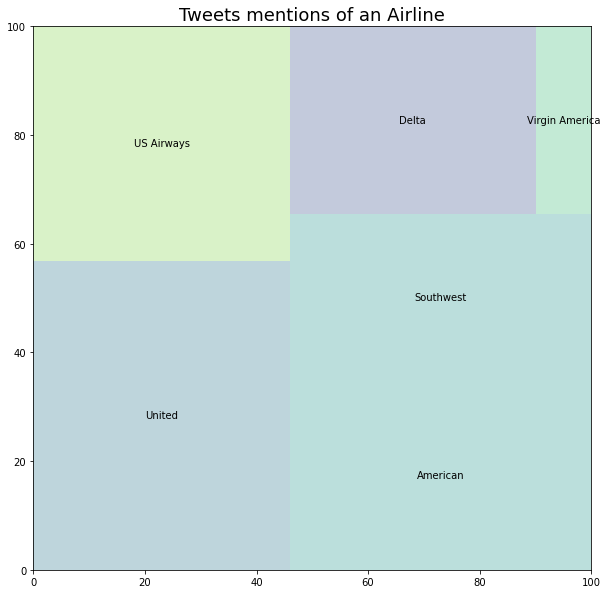

In [66]:
import squarify
labels = ['United','US Airways','American','Southwest','Delta','Virgin America']
sizes = [0.261, 0.198, 0.188, 0.165, 0.152, 0.0344]
plt.subplots(figsize=(10,10))
squarify.plot(sizes=sizes, label=labels, alpha=0.3)
plt.title('Tweets mentions of an Airline', fontsize=18)

In [67]:
label = ['positive','negative','neutral']
final_df['sentiment'].value_counts()


neutral     5528
positive    5459
negative    3653
Name: sentiment, dtype: int64

Text(0, 0.5, 'Mood')

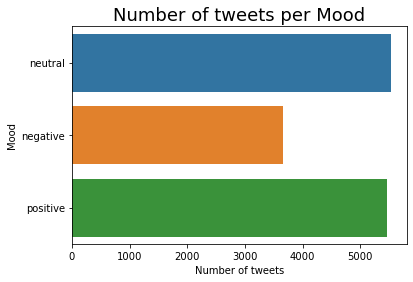

In [68]:
sns.countplot(y='sentiment', data=final_df)
plt.title('Number of tweets per Mood', fontsize=18)
plt.xlabel('Number of tweets')
plt.ylabel('Mood')

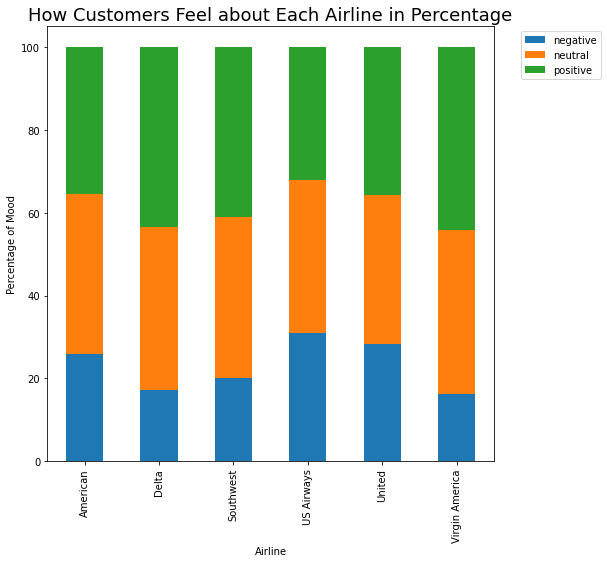

In [69]:
cross1 = pd.crosstab(final_df.airline, final_df.sentiment).apply(lambda x: x / x.sum() * 100, axis=1).plot(kind='bar',title='How Customers Feel about Each Airline in Percentage',figsize=(8,8),stacked=True)
cross1.title.set_size(18)
cross1.set_xlabel('Airline')
cross1.set_ylabel('Percentage of Mood')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [70]:
pd.crosstab(final_df.airline, final_df.sentiment)

sentiment,negative,neutral,positive
airline,,,
American,716,1066,977
Delta,381,878,963
Southwest,489,937,994
US Airways,902,1073,938
United,1083,1374,1365
Virgin America,82,200,222


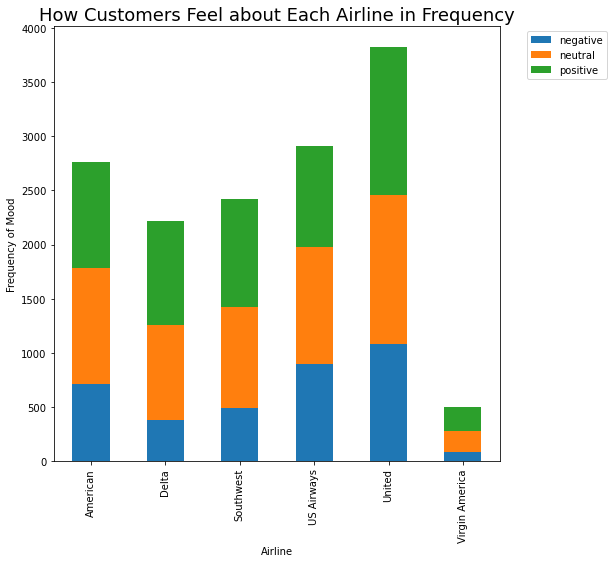

In [71]:
cross2 = pd.crosstab(final_df.airline, final_df.sentiment).plot(kind="bar",title='How Customers Feel about Each Airline in Frequency',figsize=(8,8),stacked=True)
cross2.title.set_size(18)
cross2.set_xlabel('Airline')
cross2.set_ylabel('Frequency of Mood')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

# Wordclouds

## Negative Words

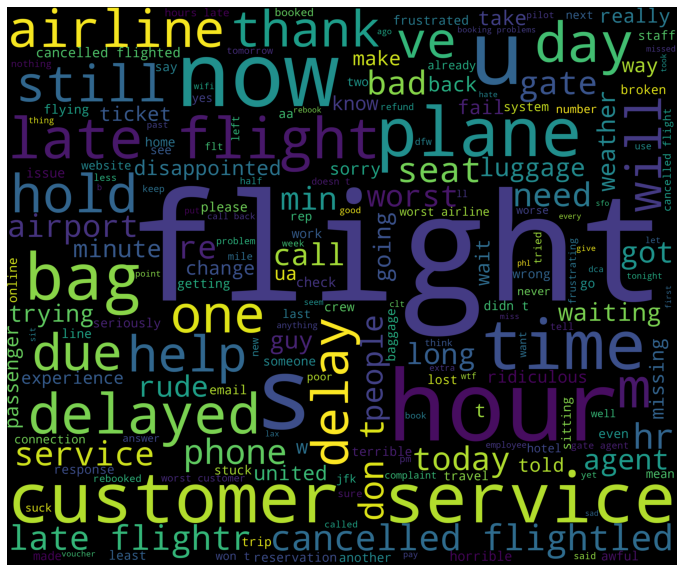

In [72]:
df_negative = final_df[final_df['sentiment']=='negative']
words = ' '.join(df_negative['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)


plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Positive

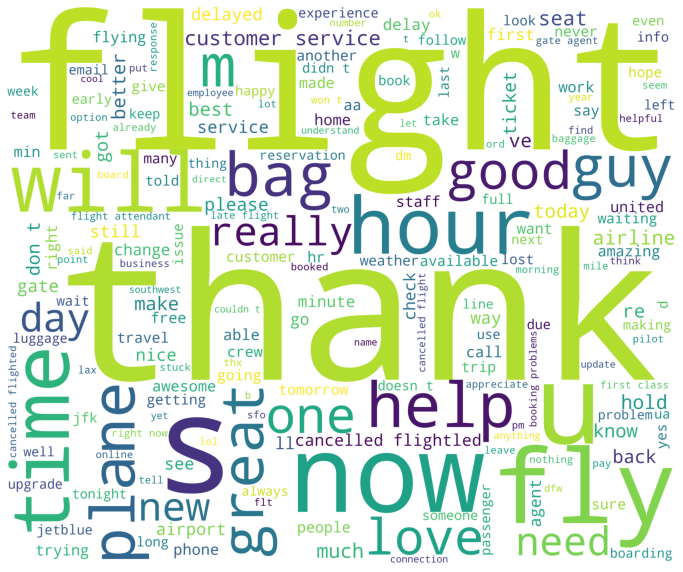

In [73]:
df_postive = final_df [final_df['sentiment']=='positive']
words = ' '.join(df_postive['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)


plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Neutral

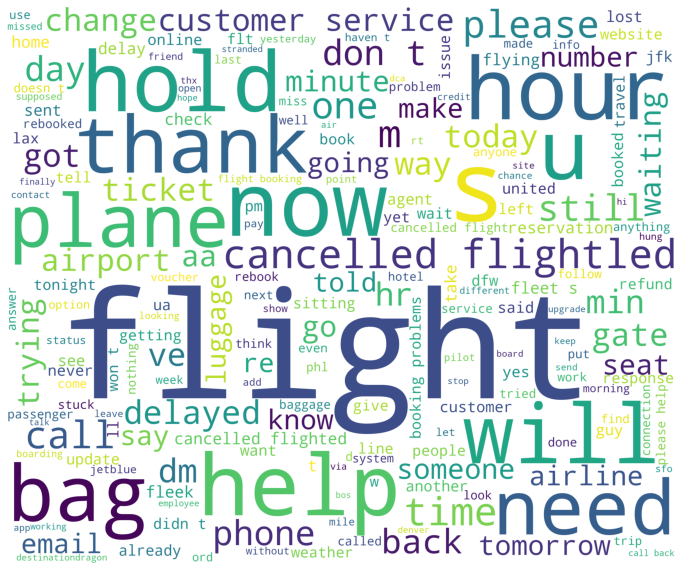

In [74]:
df_neutral = final_df[final_df['sentiment']=='neutral']
words = ' '.join(df_neutral['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Sentiment Prediction

In [75]:
final_df.head()

,text,airline,polarity,subjectivity,sentiment
0,what said,Virgin America,0.00000,0.000000,neutral
1,plus you ve added commercials to the experienc...,Virgin America,0.00000,0.000000,neutral
2,i didn t today must mean i need to take anothe...,Virgin America,-0.31250,0.687500,negative
3,it s really aggressive to blast obnoxious ente...,Virgin America,0.00625,0.350000,positive
4,and it s a really big bad thing about it,Virgin America,-0.35000,0.383333,negative


In [76]:
final_df['length'] = final_df['text'].apply(len)

In [77]:
final_df

,text,airline,polarity,subjectivity,sentiment,length
0,what said,Virgin America,0.000000,0.000000,neutral,9
1,plus you ve added commercials to the experienc...,Virgin America,0.000000,0.000000,neutral,53
2,i didn t today must mean i need to take anothe...,Virgin America,-0.312500,0.687500,negative,52
3,it s really aggressive to blast obnoxious ente...,Virgin America,0.006250,0.350000,positive,102
4,and it s a really big bad thing about it,Virgin America,-0.350000,0.383333,negative,40
...,...,...,...,...,...,...
14635,thank you we got on a different flight to chicago,American,0.000000,0.600000,neutral,49
14636,leaving over minutes late flight no warnings o...,American,-0.300000,0.600000,negative,129
14637,please bring american airlines to blackberry,American,0.000000,0.000000,neutral,44
14638,you have my money you change my flight and don...,American,-0.125000,0.375000,negative,117


In [78]:
from sklearn.feature_extraction.text import CountVectorizer
bag_of_words = CountVectorizer()
bag_of_words.fit(final_df['text'])
bag_of_words.vocabulary_

{'what': 10824,
 'said': 8422,
 'plus': 7346,
 'you': 11131,
 've': 10537,
 'added': 126,
 'commercials': 1899,
 'to': 9944,
 'the': 9775,
 'experience': 3368,
 'tacky': 9593,
 'didn': 2635,
 'today': 9947,
 'must': 6350,
 'mean': 5983,
 'need': 6429,
 'take': 9609,
 'another': 444,
 'trip': 10114,
 'it': 5100,
 'really': 7848,
 'aggressive': 210,
 'blast': 1073,
 'obnoxious': 6720,
 'entertainment': 3174,
 'in': 4808,
 'your': 11140,
 'guests': 4262,
 'faces': 3428,
 'they': 9806,
 'have': 4377,
 'little': 5630,
 'recourse': 7904,
 'and': 403,
 'big': 1011,
 'bad': 784,
 'thing': 9815,
 'about': 30,
 'seriously': 8665,
 'would': 11036,
 'pay': 7114,
 'flight': 3665,
 'for': 3772,
 'seats': 8585,
 'that': 9770,
 'this': 9827,
 'playing': 7311,
 'only': 6816,
 'flying': 3726,
 'va': 10498,
 'yes': 11118,
 'nearly': 6425,
 'every': 3277,
 'time': 9905,
 'fly': 3717,
 'vx': 10648,
 'ear': 2986,
 'worm': 11010,
 'won': 10974,
 'go': 4103,
 'away': 742,
 'missed': 6176,
 'prime': 7540,
 'op

In [79]:
txt_transform = bag_of_words.transform(final_df.text)
print(txt_transform.shape)
txt_transform

(14640, 11196)


<14640x11196 sparse matrix of type '<class 'numpy.int64'>'
	with 210240 stored elements in Compressed Sparse Row format>

In [80]:
final_df

,text,airline,polarity,subjectivity,sentiment,length
0,what said,Virgin America,0.000000,0.000000,neutral,9
1,plus you ve added commercials to the experienc...,Virgin America,0.000000,0.000000,neutral,53
2,i didn t today must mean i need to take anothe...,Virgin America,-0.312500,0.687500,negative,52
3,it s really aggressive to blast obnoxious ente...,Virgin America,0.006250,0.350000,positive,102
4,and it s a really big bad thing about it,Virgin America,-0.350000,0.383333,negative,40
...,...,...,...,...,...,...
14635,thank you we got on a different flight to chicago,American,0.000000,0.600000,neutral,49
14636,leaving over minutes late flight no warnings o...,American,-0.300000,0.600000,negative,129
14637,please bring american airlines to blackberry,American,0.000000,0.000000,neutral,44
14638,you have my money you change my flight and don...,American,-0.125000,0.375000,negative,117


In [81]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
final_df['sentiment'] = encoder.fit_transform(final_df['sentiment'])

In [82]:

y = final_df['sentiment']

In [83]:
final_df

,text,airline,polarity,subjectivity,sentiment,length
0,what said,Virgin America,0.000000,0.000000,1,9
1,plus you ve added commercials to the experienc...,Virgin America,0.000000,0.000000,1,53
2,i didn t today must mean i need to take anothe...,Virgin America,-0.312500,0.687500,0,52
3,it s really aggressive to blast obnoxious ente...,Virgin America,0.006250,0.350000,2,102
4,and it s a really big bad thing about it,Virgin America,-0.350000,0.383333,0,40
...,...,...,...,...,...,...
14635,thank you we got on a different flight to chicago,American,0.000000,0.600000,1,49
14636,leaving over minutes late flight no warnings o...,American,-0.300000,0.600000,0,129
14637,please bring american airlines to blackberry,American,0.000000,0.000000,1,44
14638,you have my money you change my flight and don...,American,-0.125000,0.375000,0,117


In [84]:
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB()
mn.fit(txt_transform,y)


MultinomialNB()